In [1]:
import cv2,os

In [2]:
data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [3]:
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Coverting the image into gray scale
            resized=cv2.resize(gray,(100,100)) #resizing the gray scale into 100x100
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        
        except Exception as e:
            print('Exception:',e)

In [4]:
!pip install tensorflow

In [5]:
!pip install keras

In [6]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100,100,1))
target=np.array(target)

from tensorflow.keras.utils import to_categorical
new_target=to_categorical(target)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


In [8]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()



C:\Users\jilin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 200)    │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 100)    │       180,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 52900)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 52900)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │     2,645,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,827,252 (10.79 MB)

 Trainable params: 2,827,252 (10.79 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [10]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 757ms/step - accuracy: 0.5605 - loss: 0.7306 - val_accuracy: 0.9167 - val_loss: 0.5364
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 676ms/step - accuracy: 0.8649 - loss: 0.4226 - val_accuracy: 0.9861 - val_loss: 0.0728
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 706ms/step - accuracy: 0.9612 - loss: 0.1033 - val_accuracy: 0.9931 - val_loss: 0.0151
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 691ms/step - accuracy: 0.9643 - loss: 0.0916 - val_accuracy: 1.0000 - val_loss: 0.0221
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 697ms/step - accuracy: 0.9920 - loss: 0.0372 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 699ms/step - accuracy: 0.9906 - loss: 0.0187 - val_accuracy: 1.0000 - val_loss: 5.2304e-04
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 678ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 9.0455e-04
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 702ms/step - accuracy: 0.9980 - loss: 0.0077 - 

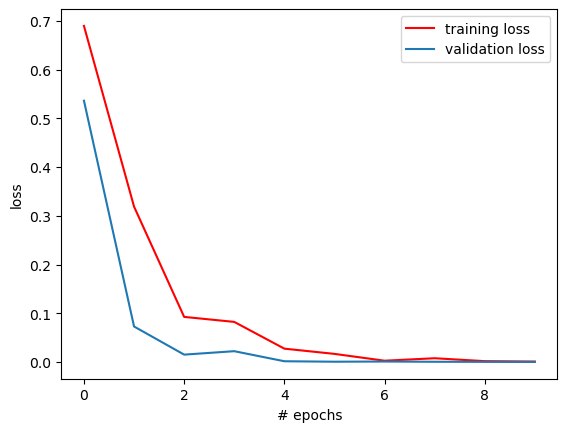

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

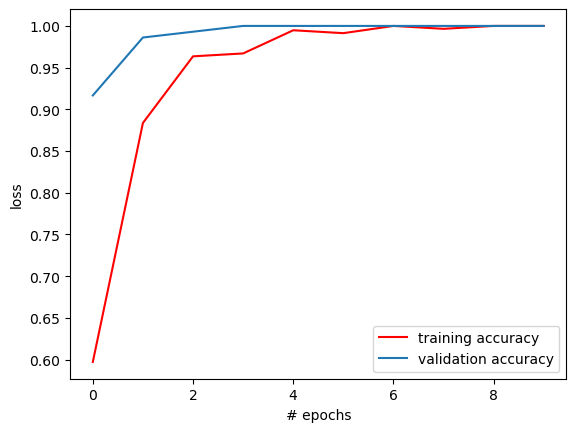

In [12]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
print(model.evaluate(test_data,test_target))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 1.0000 - loss: 3.2385e-04
[0.00030187558149918914, 1.0]


In [1]:
from keras.models import load_model
model = load_model('model-008.keras')

In [2]:
import cv2
import numpy as np

In [3]:

prototxtPath = r"Downloads\deploy.prototxt"
weightsPath = r"Downloads\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

labels_dict = {0: 'NO GAY', 1: 'GAY'}
color_dict = {0: (0, 0, 255), 1: (0, 255, 0)}



In [4]:
capture = cv2.VideoCapture(0)

while True:
    flag, img = capture.read()
    if not flag:
        break
    h, w = img.shape[:2]

    #Preprocess the frame
    blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (104.0, 177.0, 123.0))
    faceNet.setInput(blob)
    detections = faceNet.forward()

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        
        if confidence > 0.5:
            # Compute bounding box coordinates
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # Extract and preprocess the face 
            face = img[startY:endY, startX:endX]
            # Convert the face region to grayscale
            gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            
            if face.size > 0:  
                resized = cv2.resize(gray_face, (100, 100))
                normalized = resized / 255.0
                reshaped = np.reshape(normalized, (1, 100, 100, 1))  
                result = model.predict(reshaped)

                label = np.argmax(result, axis=1)[0]

                cv2.rectangle(img, (startX, startY), (endX, endY), color_dict[label], 2)
                cv2.rectangle(img, (startX, startY - 40), (endX, startY), color_dict[label], -1)
                cv2.putText(img, labels_dict[label], (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow('OUTPUT', img)
    if cv2.waitKey(1) == 27:
        break

capture.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
